<a href="https://colab.research.google.com/github/blablamukul/colab_notebooks/blob/main/flowers_image_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import PIL
import cv2
import tensorflow_hub as hub

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [ ]:
data_dir

'./datasets/flower_photos'

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [ ]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/14943194730_f48b4d4547_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4325834819_ab56661dcc_m.jpg'),
 PosixPath('datasets/flower_photos/roses/6039330368_c30ed224c4_m.jpg'),
 PosixPath('datasets/flower_photos/roses/16374919860_4e445de29f_n.jpg'),
 PosixPath('datasets/flower_photos/roses/14687731322_5613f76353.jpg')]

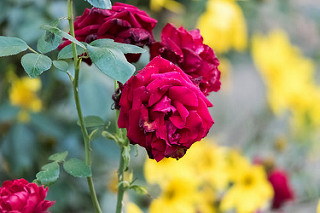

In [ ]:
PIL.Image.open(str(roses[0]))

In [ ]:
flower_data_dict = {
    'roses' : list(data_dir.glob('roses/*')),
    'daisy' : list(data_dir.glob('daisy/*')),
    'dandelion' : list(data_dir.glob('dandelion/*')),
    'sunflowers' : list(data_dir.glob('sunflowers/*')),
    'tulips' : list(data_dir.glob('tulips/*'))
}

In [ ]:
flower_labels_dict = {
    'roses' : 0,
    'daisy' : 1,
    'dandelion' : 2,
    'sunflowers' : 3,
    'tulips' : 4
}

In [ ]:
img_array = cv2.imread(str(flower_data_dict['roses'][0]))
img_array.shape

(213, 320, 3)

In [ ]:
X,y = [], []

In [ ]:
for flower_name, images in flower_data_dict.items():
  for image in images:
    img_array = cv2.imread(str(image))
    img_array_resized = cv2.resize(img_array,(224,224))
    X.append(img_array_resized)
    y.append(flower_labels_dict[flower_name])

In [ ]:
len(X)

3670

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state= 0)

In [ ]:
X_test_scaled = X_test/255
X_train_scaled = X_train/255

In [ ]:
model = keras.Sequential([
        keras.layers.Conv2D(16,(3,3), padding='same',activation = 'relu'),
        keras.layers.MaxPooling2D(),
        keras.layers.Conv2D(32,(3,3), padding='same',activation = 'relu'),
        keras.layers.MaxPooling2D(),
        keras.layers.Conv2D(64,(3,3), padding='same',activation = 'relu'),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation = 'relu'),
        keras.layers.Dense(5, activation = 'softmax')])
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(X_train_scaled, y_train, epochs =17)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-17-227e0ab44b1c>", line 9, in <module>
    keras.layers.Dense(5, activation = 'softmax')])
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/training/tracking/base.py", line 517, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py", line 118, in __init__
    name=name, autocast=False)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/training/tracking/base.py", line 517, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py", line 293, in __init__
    self._init_batch_counters()
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/trai

KeyboardInterrupt: ignored

In [ ]:
model.evaluate(X_test,y_test)

In [ ]:
data_augmentation = keras.Sequential(
  [
    keras.layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(180, 
                                                              180,
                                                              3)),
    keras.layers.experimental.preprocessing.RandomRotation(0.1),
    keras.layers.experimental.preprocessing.RandomZoom(0.1),
    keras.layers.experimental.preprocessing.RandomContrast(0.1)
  ]
)

In [ ]:
model = keras.Sequential([
        data_augmentation,
        keras.layers.Conv2D(16,(3,3), padding='same',activation = 'relu'),
        keras.layers.Conv2D(16,(3,3), padding='same',activation = 'relu'),
        keras.layers.MaxPooling2D(),
        #keras.layers.Dropout(0.1),
        keras.layers.Conv2D(32,(3,3), padding='same',activation = 'relu'),
        keras.layers.Conv2D(32,(3,3), padding='same',activation = 'relu'),
        keras.layers.MaxPooling2D(),
        #keras.layers.Dropout(0.1),
        keras.layers.Conv2D(64,(3,3), padding='same',activation = 'relu'),
        keras.layers.Conv2D(64,(3,3), padding='same',activation = 'relu'),
        keras.layers.MaxPooling2D(),
        keras.layers.Dropout(0.1),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation = 'relu'),
        keras.layers.Dense(5, activation = 'softmax')])
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(X_train_scaled, y_train, epochs =40)

Epoch 1/40
86/86 [==============================] - 9s 97ms/step - loss: 1.5718 - accuracy: 0.2889
Epoch 2/40
86/86 [==============================] - 8s 97ms/step - loss: 1.3282 - accuracy: 0.4399
Epoch 3/40
86/86 [==============================] - 8s 97ms/step - loss: 1.0953 - accuracy: 0.5692
Epoch 4/40
86/86 [==============================] - 8s 97ms/step - loss: 1.0121 - accuracy: 0.6094
Epoch 5/40
86/86 [==============================] - 8s 97ms/step - loss: 0.9288 - accuracy: 0.6544
Epoch 6/40
86/86 [==============================] - 8s 97ms/step - loss: 0.8694 - accuracy: 0.6693
Epoch 7/40
86/86 [==============================] - 8s 97ms/step - loss: 0.8348 - accuracy: 0.6751
Epoch 8/40
86/86 [==============================] - 8s 97ms/step - loss: 0.8307 - accuracy: 0.6825
Epoch 9/40
86/86 [==============================] - 8s 97ms/step - loss: 0.7539 - accuracy: 0.7157
Epoch 10/40
86/86 [==============================] - 8s 96ms/step - loss: 0.7030 - accuracy: 0.7371
Epoch 11/

In [ ]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 33ms/step - loss: 1.2853 - accuracy: 0.7233


[1.2852810621261597, 0.7233115434646606]

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/Saved_Models/flowerrecognition.h5')

In [ ]:
tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')

16384/10484 [==============================================] - 0s 0us/step


'/root/.keras/datasets/ImageNetLabels.txt'

In [ ]:
IMAGE_SHAPE = (224, 224)

classifier = keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=(224,224,3))
])

In [ ]:
image_labels = []
with open("/root/.keras/datasets/ImageNetLabels.txt", "r") as f:
  image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [ ]:
transfer_model = keras.Sequential([
                  hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4", input_shape = (224,224,3), trainable = False),
                  keras.layers.Dense(5, activation = 'softmax')])
transfer_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
transfer_model.fit(X_train_scaled, y_train, epochs = 5)

Epoch 1/5
86/86 [==============================] - 13s 38ms/step - loss: 1.1347 - accuracy: 0.5647
Epoch 2/5
86/86 [==============================] - 3s 39ms/step - loss: 0.4535 - accuracy: 0.8467
Epoch 3/5
86/86 [==============================] - 3s 38ms/step - loss: 0.3231 - accuracy: 0.8932
Epoch 4/5
86/86 [==============================] - 3s 38ms/step - loss: 0.2837 - accuracy: 0.9064
Epoch 5/5
86/86 [==============================] - 3s 38ms/step - loss: 0.2331 - accuracy: 0.9338
